In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss
import scipy
from scipy.stats import norm

In [ ]:
pd.set_option('display.float_format', '{:.6f}'.format)
# Don't like seeing scientific notation

# Calculating the Annual Volatility of the S&P 500(year = 2024)

In [ ]:
import yfinance as yf
df = yf.download('^SPX', start='2023-12-31', end='2024-12-30')
df.reset_index(inplace=True)
df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,^SPX,^SPX,^SPX,^SPX,^SPX,^SPX
0,2024-01-02,4742.830078,4742.830078,4754.330078,4722.669922,4745.200195,3743050000
1,2024-01-03,4704.810059,4704.810059,4729.290039,4699.709961,4725.069824,3950760000
2,2024-01-04,4688.680176,4688.680176,4726.779785,4687.529785,4697.419922,3715480000
3,2024-01-05,4697.240234,4697.240234,4721.490234,4682.109863,4690.569824,3844370000
4,2024-01-08,4763.540039,4763.540039,4764.540039,4699.819824,4703.700195,3742320000
...,...,...,...,...,...,...,...
245,2024-12-20,5930.850098,5930.850098,5982.060059,5832.299805,5842.000000,8223220000
246,2024-12-23,5974.069824,5974.069824,5978.250000,5902.569824,5940.250000,3593280000
247,2024-12-24,6040.040039,6040.040039,6040.100098,5981.439941,5984.629883,1757720000


In [ ]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = np.log(df.Close/df.Open)
    log_return = log_return.dropna()
    daily_vol = log_return.std()
    vol = daily_vol*np.sqrt(len(df))


    return vol

In [ ]:
vol = annual_vol(df).iloc[0]
print(f"The Annual Volatility is {vol}")

The Annual Volatility is 0.09697657348502846


# Extracting Option Chain from yfinance

In [ ]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [ ]:
dfo.options # different expiration dates available

('2024-12-30',
 '2024-12-31',
 '2025-01-02',
 '2025-01-03',
 '2025-01-06',
 '2025-01-07',
 '2025-01-08',
 '2025-01-09',
 '2025-01-10',
 '2025-01-13',
 '2025-01-14',
 '2025-01-15',
 '2025-01-16',
 '2025-01-17',
 '2025-01-21',
 '2025-01-22',
 '2025-01-23',
 '2025-01-24',
 '2025-01-27',
 '2025-01-28',
 '2025-01-29',
 '2025-01-31',
 '2025-02-03',
 '2025-02-05',
 '2025-02-07',
 '2025-02-21',
 '2025-02-28',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-04-30',
 '2025-05-16',
 '2025-05-30',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-09-30',
 '2025-10-17',
 '2025-11-21',
 '2025-12-19',
 '2026-01-16',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [ ]:
expiration_date ='2025-01-29'

In [ ]:
dfo_exp = dfo.option_chain(expiration_date)

In [ ]:
dfo_exp.calls.head(10)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW250129C02600000,2024-12-17 01:15:49+00:00,2600.000000,3486.600000,3370.200000,3394.200000,0.000000,0.000000,NaN,7,1.342960,True,REGULAR,USD
1,SPXW250129C02800000,2024-12-17 01:15:49+00:00,2800.000000,3287.900000,3171.200000,3195.200000,0.000000,0.000000,NaN,7,1.249485,True,REGULAR,USD
2,SPXW250129C05000000,2024-12-19 18:15:13+00:00,5000.000000,940.630000,984.600000,1008.600000,0.000000,0.000000,NaN,1,0.467237,True,REGULAR,USD
3,SPXW250129C05300000,2024-12-16 14:56:59+00:00,5300.000000,812.150000,688.600000,712.600000,0.000000,0.000000,6.000000,6,0.360160,True,REGULAR,USD
4,SPXW250129C05500000,2024-12-16 15:08:48+00:00,5500.000000,621.350000,494.400000,518.400000,0.000000,0.000000,NaN,33,0.292503,True,REGULAR,USD
5,SPXW250129C05700000,2024-12-17 14:58:53+00:00,5700.000000,414.310000,308.000000,332.000000,0.000000,0.000000,NaN,0,0.231140,True,REGULAR,USD
6,SPXW250129C05800000,2024-12-27 20:33:51+00:00,5800.000000,219.360000,220.900000,244.900000,0.399994,0.182679,6.000000,77,0.203396,True,REGULAR,USD
7,SPXW250129C05900000,2024-12-27 19:23:24+00:00,5900.000000,146.600000,151.900000,153.600000,-34.949997,-19.250893,5.000000,103,0.161095,True,REGULAR,USD
8,SPXW250129C05940000,2024-12-26 15:40:00+00:00,5940.000000,117.500000,123.100000,124.800000,-43.699997,-27.109179,8.000000,18,0.152110,True,REGULAR,USD
9,SPXW250129C05950000,2024-12-26 20:04:37+00:00,5950.000000,163.000000,116.200000,118.000000,0.000000,0.000000,1.000000,5,0.149987,True,REGULAR,USD


In [ ]:
dfo_exp.puts.head(10)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW250129P02800000,2024-12-18 15:58:39+00:00,2800.000000,0.300000,0.250000,0.550000,0.000000,0.000000,NaN,78,0.841066,False,REGULAR,USD
1,SPXW250129P03000000,2024-12-19 17:22:38+00:00,3000.000000,1.900000,0.400000,0.700000,0.000000,0.000000,NaN,14,0.790529,False,REGULAR,USD
2,SPXW250129P03200000,2024-12-24 16:22:38+00:00,3200.000000,0.810000,0.550000,0.850000,0.000000,0.000000,6.000000,68,0.737307,False,REGULAR,USD
3,SPXW250129P03400000,2024-12-19 07:20:08+00:00,3400.000000,3.200000,0.700000,1.000000,0.000000,0.000000,NaN,20,0.682987,False,REGULAR,USD
4,SPXW250129P03600000,2024-12-27 20:45:08+00:00,3600.000000,1.150000,0.900000,1.200000,0.280000,32.183903,10.000000,65,0.631962,False,REGULAR,USD
5,SPXW250129P03800000,2024-12-19 20:27:40+00:00,3800.000000,4.900000,1.150000,1.450000,0.000000,0.000000,21.000000,22,0.582646,False,REGULAR,USD
6,SPXW250129P04000000,2024-12-26 20:36:32+00:00,4000.000000,1.370000,1.400000,1.800000,0.000000,0.000000,26.000000,89,0.534306,False,REGULAR,USD
7,SPXW250129P04200000,2024-12-27 20:45:08+00:00,4200.000000,2.120000,1.700000,2.050000,-0.980000,-31.612906,20.000000,243,0.489202,False,REGULAR,USD
8,SPXW250129P04400000,2024-12-26 20:32:42+00:00,4400.000000,2.020000,2.100000,2.400000,0.000000,0.000000,34.000000,150,0.439428,False,REGULAR,USD
9,SPXW250129P04600000,2024-12-20 18:05:40+00:00,4600.000000,6.500000,2.550000,2.850000,0.000000,0.000000,14.000000,2027,0.390997,False,REGULAR,USD


# Black Scholes

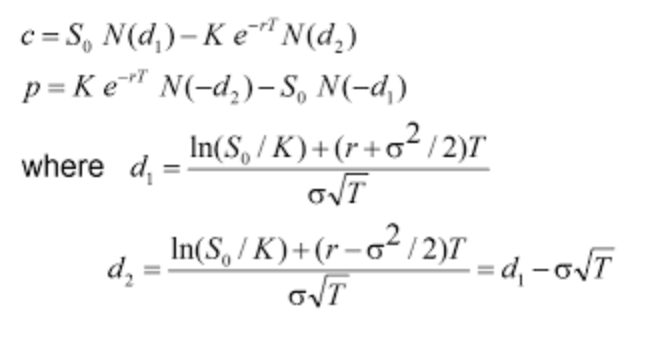

In [ ]:
def euro_vanilla(S, K, T, r, sigma, option):
    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    if(option == 'call'):

        premium = S*scipy.stats.norm.cdf(d1) - K*np.exp(-r*T)*scipy.stats.norm.cdf(d2)


    else:
        premium = K*np.exp(-r*T)*scipy.stats.norm.cdf(-d2) - S*scipy.stats.norm.cdf(-d1)
    return premium

In [ ]:
from datetime import datetime


date1 = datetime.strptime('2025-01-29', '%Y-%m-%d')
date2 = datetime.strptime('2024-12-28', '%Y-%m-%d')


d = (date1 - date2).days # Calculate the difference in days
T = d/365 # Number of days left for expiry from your calculation in years
t = T/100
print(f"No. of Days Left to Expiration = {d}")
print(f"No. of Days Left to Expiration in years = {T}")
print(f"T/100 = {t}")

No. of Days Left to Expiration = 32
No. of Days Left to Expiration in years = 0.08767123287671233
T/100 = 0.0008767123287671233


In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond = 0.0523
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = 5970, K = K, T = T, r=0.0523*t, sigma=vol,option = 'call')
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)

#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)

call = th_call
call["ac_call"] = ac_call
call.head(10)


,th_call,ac_call
2600.000000,3370.010452,3486.600000
2800.000000,3170.011256,3287.900000
5000.000000,970.020099,940.630000
5300.000000,670.021904,812.150000
5500.000000,470.125780,621.350000
5700.000000,273.807616,414.310000
5800.000000,183.933524,219.360000
5900.000000,108.655744,146.600000
5940.000000,84.274380,117.500000
5950.000000,78.749671,163.000000


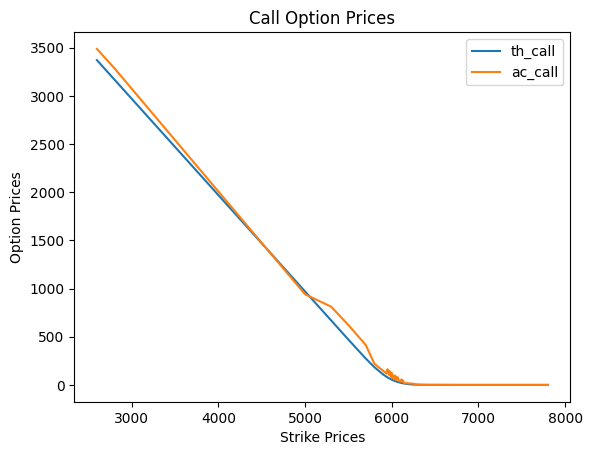

In [ ]:
call.plot() #plotting the actual and theoretical call prices
plt.xlabel('Strike Prices')
plt.ylabel('Option Prices')
plt.title('Call Option Prices')
plt.show()

In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond = 0.0523
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = 5970, K = K, T = T, r=0.0523*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)

#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

put = th_put
put["ac_put"] = ac_put
put



,th_put,ac_put
2800.000000,0.000000,0.300000
3000.000000,0.000000,1.900000
3200.000000,0.000000,0.810000
3400.000000,0.000000,3.200000
3600.000000,0.000000,1.150000
...,...,...
6200.000000,237.655169,148.240000
6250.000000,284.088790,332.450000
6300.000000,332.058757,378.480000
6500.000000,530.051990,418.410000


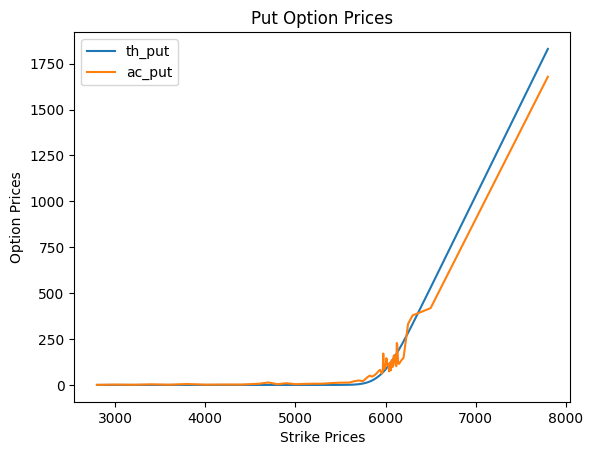

In [ ]:
put.plot()
plt.xlabel('Strike Prices')
plt.ylabel('Option Prices')
plt.title('Put Option Prices')
plt.show()

# Greeks

In [ ]:
import numpy as np
from scipy.stats import norm

def delta_greek(r, S, K, T, sigma, option_type="c"):

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

    if option_type == "c":
        return norm.cdf(d1)
    elif option_type == "p":
        return -norm.cdf(-d1)



def gamma_greek(r, S, K, T, sigma, option_type="c"):

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))


def vega_greek(r, S, K, T, sigma, option_type="c"):

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)


def theta_greek(r, S, K, T, sigma, option_type="c"):

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "c":
        theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "p":
        theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)


    # Return daily theta (divide by 365 to convert to daily decay)
    return theta / 365


def rho_greek(r, S, K, T, sigma, option_type="c"):


    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "c":
        return K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "p":
        return -K * T * np.exp(-r * T) * norm.cdf(-d2)



In [ ]:
import pandas as pd

def calculate_greeks(strike_prices, S, T, r, sigma, option_type):
    results = []
    for K in strike_prices:
        # Correct the order of arguments passed
        greek_delta = delta_greek(r, S, K, T, sigma, option_type)
        greek_gamma = gamma_greek(r, S, K, T, sigma, option_type)
        greek_theta = theta_greek(r, S, K, T, sigma, option_type)
        greek_vega = vega_greek(r, S, K, T, sigma, option_type)
        greek_rho = rho_greek(r, S, K, T, sigma, option_type)

        # Store the results in a dictionary for each strike price
        results.append({
            'Strike Price': K,
            'Delta': greek_delta,
            'Gamma': greek_gamma,
            'Theta': greek_theta,
            'Vega': greek_vega,
            'Rho': greek_rho
        })

    # Convert the list of results into a DataFrame
    return pd.DataFrame(results)



In [ ]:
list_call = np.array(dfo_exp.calls['strike'])

In [ ]:
df_greek_call =  calculate_greeks(strike_prices = list_call, S= 5970, T= T, r= 0.0523 * t , sigma = 	vol, option_type= 'c')

In [ ]:
df_greek_call.head(10)

,Strike Price,Delta,Gamma,Theta,Vega,Rho
0,2600.000000,1.000000,0.000000,-0.000327,0.000000,227.944289
1,2800.000000,1.000000,0.000000,-0.000352,0.000000,245.478465
2,5000.000000,1.000000,0.000000,-0.000628,0.000003,438.354402
3,5300.000000,0.999984,0.000000,-0.000852,0.123053,464.647293
4,5500.000000,0.997949,0.000038,-0.018065,11.466994,481.107217
5,5700.000000,0.948054,0.000620,-0.285448,187.935515,472.203994
6,5800.000000,0.846275,0.001382,-0.635386,418.921251,426.812429
7,5900.000000,0.664675,0.002126,-0.976666,644.233761,338.363061
8,5940.000000,0.575323,0.002286,-1.049880,692.593777,293.734235
9,5950.000000,0.552256,0.002307,-1.059786,699.142652,282.145199


In [ ]:
list_put = np.array(dfo_exp.puts['strike'])

In [ ]:
df_greek_put =  calculate_greeks(strike_prices = list_put, S= 5970, T= T, r= 0.0523 * t , sigma = 	vol, option_type= 'p')

In [ ]:
df_greek_put # The first few rows have all zeroes as no one is buying put options with such low a strike price

,Strike Price,Delta,Gamma,Theta,Vega,Rho
0,2800.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
1,3000.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
2,3200.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
3,3400.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
4,3600.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
...,...,...,...,...,...,...
56,6200.000000,-0.903544,0.000997,-0.457102,302.132725,-493.747827
57,6250.000000,-0.943146,0.000666,-0.305114,201.851417,-518.546215
58,6300.000000,-0.968503,0.000413,-0.188977,125.222932,-536.024059
59,6500.000000,-0.998399,0.000030,-0.013055,9.153904,-569.029598
